In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [6]:
before = np.array([26 * 60 + 12, 26 * 60 + 6, 26 * 60 + 13, 26 * 60 + 4, 26 * 60 + 18])
after  = np.array([26 * 60 + 14, 26 * 60 + 24, 26 * 60 + 13, 26 * 60 + 28, 26 * 60 + 28])

In [7]:
# Mean and SD
mean_before = np.mean(before)
std_before = np.std(before, ddof=1)
mean_after = np.mean(after)
std_after = np.std(after, ddof=1)

# Difference
diff = mean_before - mean_after
improvement = diff / mean_before * 100

# Paired t-test
t_stat, p_value = stats.ttest_rel(before, after)

print(f"Before: {mean_before:.2f} ± {std_before:.2f} s")
print(f"After: {mean_after:.2f} ± {std_after:.2f} s")
print(f"Difference: {diff:.2f} s ({improvement:.2f}%)")
print(f"t={t_stat:.2f}, p={p_value:.4f}")

Before: 1570.60 ± 5.64 s
After: 1581.40 ± 7.40 s
Difference: -10.80 s (-0.69%)
t=-2.35, p=0.0781


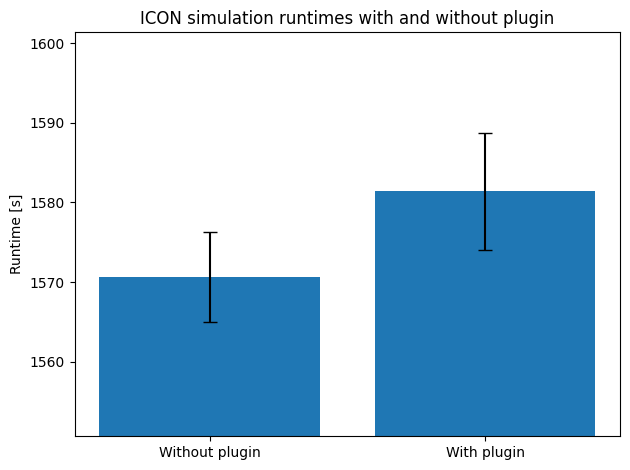

In [9]:
labels = ['Without plugin', 'With plugin']
means = [mean_before, mean_after]
stds = [std_before, std_after]

# Bar plot
plt.bar(labels, means, yerr=stds, capsize=5)
plt.ylabel('Runtime [s]')
plt.title('ICON simulation runtimes with and without plugin')

# Zoom in around the means
ymin = min(means) - 20
ymax = max(means) + 20
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.savefig('runtime_benchmark_zoomed.png', dpi=300)
plt.show()